In [3]:
%matplotlib inline
import sys
import os
sys.path.append('C:/Users/yliu60/Documents/GitHub/amodalAPI/PythonAPI/pycocotools')
sys.path.append('C:/Users/Yanfeng Liu/Documents/GitHub/amodalAPI/PythonAPI/pycocotools')
import random
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from pycocotools.amodal import Amodal
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
dataset = 'bsds' # 'coco' or 'bsds'
if dataset == 'coco':
    print("show COCO examples")
    dataDir='../images/val2014/' # 'train2014','test2014'
    gtFile = '../annotations/COCO_amodal_val2014.json'
elif dataset == 'bsds':
    print("show BSDS examples")
    dataDir = 'C:/Users/Yanfeng Liu/Downloads/BSR_full/BSR/BSDS500/data/images/test'
    gtFile = 'C:/Users/Yanfeng Liu/Downloads/annotations/annotations/BSDS_amodal_test.json'
amodal=Amodal(gtFile)

show BSDS examples
loading annotations into memory...
Done (t=0.62s)
creating index...
index created!


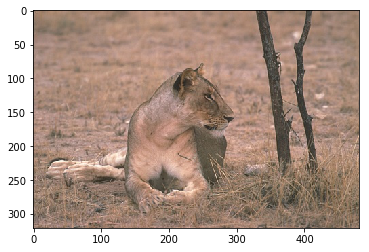

In [3]:
# random select one image
imgId = random.choice(amodal.dataset['images'])['id']
#imgId = 327590 # cached image demo for coco
annIds = amodal.getAmodalAnnIds(imgIds=imgId)
anns = amodal.loadAnns(annIds)
ann = random.choice(anns)
img = amodal.loadImgs(imgId)[0]
I = io.imread(os.path.join(dataDir, img['file_name']))
plt.figure()
plt.imshow(I)

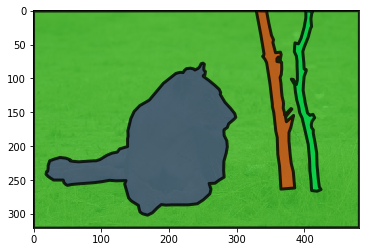

In [4]:
# display the full image annoation: draw all annotated instances with depth ordering effect
plt.figure()
plt.imshow(I)
amodal.showAmodalAnns(ann) 

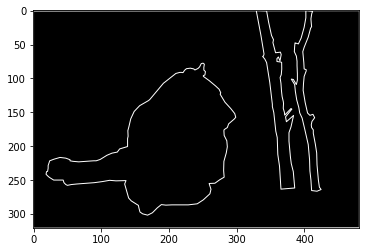

In [5]:
# display the edge map
plt.figure()
plt.imshow(np.zeros(I.shape))
amodal.showEdgeMap(ann) 

In [ ]:
# display each annotated amodal instance

for ins in range(ann['size']):
    plt.figure()
    plt.imshow(I)
    #amodal.showModalInstance(ann, ins+1) # show k-th object, with only visible mask 
    amodal.showAmodalInstance(ann, ins+1) # show k-th object, with invisible_mask highlighted 
    ax = plt.gca()
    nameStr = "region name: " + ann['regions'][ins]['name']
    depthStr = "depth order: " + str(ann['regions'][ins]['order'])
    stuffStr = "isStuff: " + str(ann['regions'][ins]['isStuff'])
    rateStr = "occlude rate: " + '%0.3f' % ann['regions'][ins]['occlude_rate']

    # show properties of the instance
    ax.annotate(nameStr, xy=(1, 1), xytext=(img['width']+ 50, 30), fontsize=15)
    ax.annotate(depthStr, xy=(1, 1), xytext=(img['width']+ 50, 60), fontsize=15)
    ax.annotate(stuffStr, xy=(1, 1), xytext=(img['width']+ 50, 90), fontsize=15)
    ax.annotate(rateStr, xy=(1, 1), xytext=(img['width']+ 50, 120), fontsize=15)

In [ ]:
# show pairwise depth ordering ground truth
# x-y means x-th object occludes y-th object 
print("depth order constraints:")   
print(ann['depth_constraint'])